In [27]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import matplotlib.pyplot as plt
import h5py

Train and test data are in .h5 format. Access them by h5py library. There are 209 training images of size 64x64 with 3 channels. 209 training labels (0: non-cat or 1: cat). Similarly, 50 test images of size 64x64 with 3 channels and 50 test labels (0: non-cat or 1: cat).

In [5]:
with h5py.File('/content/drive/My Drive/DL data/catvsnoncat/train_catvnoncat.h5', "r") as train_dataset:
    train_x_orig = np.array(train_dataset["train_set_x"][:])
    train_y_orig = np.array(train_dataset["train_set_y"][:])

with h5py.File('/content/drive/My Drive/DL data/catvsnoncat/test_catvnoncat.h5', "r") as test_dataset:
    test_x_orig = np.array(test_dataset["test_set_x"][:])
    test_y_orig = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])

print(train_x_orig.shape)
print(train_y_orig.shape)
print(test_x_orig.shape)
print(test_y_orig.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


y = 0. It's a non-cat picture.


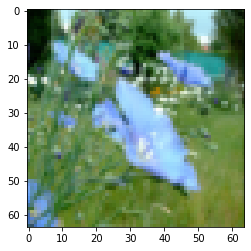

In [8]:
index = 20
plt.imshow(train_x_orig[index])
print("y = " + str(train_y_orig[index]) + ". It's a " + classes[train_y_orig[index]].decode("utf-8") +  " picture.")

Flatten the data to convert it into a vector:

In [24]:
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1) 
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1)

print(train_x.shape)
print(test_x.shape)
print(train_y_orig.shape)
print(test_y_orig.shape)

(209, 12288)
(50, 12288)
(209,)
(50,)


Standardize the data set:

In [25]:
train_x = train_x/255. 
test_x = test_x/255.

Train the model on training data and test the trained model on training & test data:

In [30]:
logreg = LogisticRegression()
logreg.fit(train_x, train_y_orig)
y_pred_train = logreg.predict(train_x)
y_pred_test = logreg.predict(test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy:

In [31]:
accuracy = metrics.accuracy_score(train_y_orig, y_pred_train)
accuracy_percentage = 100 * accuracy
accuracy_percentage

100.0

Test accuracy:

In [29]:
accuracy = metrics.accuracy_score(test_y_orig, y_pred_test)
accuracy_percentage = 100 * accuracy
accuracy_percentage

72.0